# Сбор данных

In [1]:
# import библиотек
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Парсинг данных курсов валют по отношению к тенге

In [2]:
# cоздаем URL object
url = 'https://www.nationalbank.kz/ru/exchangerates/ezhednevnye-oficialnye-rynochnye-kursy-valyut/report?rates%5B%5D=4&rates%5B%5D=5&rates%5B%5D=6&rates%5B%5D=16&rates%5B%5D=41&rates%5B%5D=2&beginDate=2014-01-01&endDate=2023-05-10'
# jтправляем запрос
page = requests.get(url)
print(page)

<Response [200]>


In [3]:
# читаем HTML-таблицы с сайта
df = pd.read_html("https://www.nationalbank.kz/ru/exchangerates/ezhednevnye-oficialnye-rynochnye-kursy-valyut/report?rates%5B%5D=4&rates%5B%5D=5&rates%5B%5D=6&rates%5B%5D=16&rates%5B%5D=41&rates%5B%5D=2&beginDate=2014-01-01&endDate=2023-05-10")
# находим сколько всего таблиц на стр
print(len(df))

1


In [4]:
# называем нужную таблицу
kurs_nationalbank = df[0]
# сохраняем DataFrame в csv
kurs_nationalbank.to_csv('kurs_nationalbank.csv', index=True)
# вывод
kurs_nationalbank

,Unnamed: 0,Числовое значение,ФУНТ СТЕРЛИНГОВ СОЕДИНЕННОГО КОРОЛЕВСТВА,Числовое значение.1,ДИРХАМ ОАЭ,Числовое значение.2,ДОЛЛАР США,Числовое значение.3,ЕВРО,Числовое значение.4,РОССИЙСКИЙ РУБЛЬ,Числовое значение.5,ТУРЕЦКАЯ ЛИРА
0,2014-01-01,1,254.80,1,41.95,1,154.06,1,212.02,1,4.68,1,72.67
1,2014-01-02,1,254.80,1,41.95,1,154.06,1,212.02,1,4.68,1,72.67
2,2014-01-03,1,254.80,1,41.95,1,154.06,1,212.02,1,4.68,1,72.67
3,2014-01-04,1,254.80,1,41.95,1,154.06,1,212.02,1,4.68,1,72.67
4,2014-01-05,1,254.80,1,41.95,1,154.06,1,212.02,1,4.68,1,72.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,2023-05-06,1,561.32,1,121.27,1,445.28,1,490.97,1,5.80,1,22.84
3413,2023-05-07,1,561.32,1,121.27,1,445.28,1,490.97,1,5.80,1,22.84
3414,2023-05-08,1,561.32,1,121.27,1,445.28,1,490.97,1,5.80,1,22.84
3415,2023-05-09,1,561.32,1,121.27,1,445.28,1,490.97,1,5.80,1,22.84


In [5]:
# смотрим на типы данных
kurs_nationalbank.dtypes

Unnamed: 0                                   object
Числовое значение                             int64
ФУНТ СТЕРЛИНГОВ СОЕДИНЕННОГО КОРОЛЕВСТВА    float64
Числовое значение.1                           int64
ДИРХАМ ОАЭ                                  float64
Числовое значение.2                           int64
ДОЛЛАР США                                  float64
Числовое значение.3                           int64
ЕВРО                                        float64
Числовое значение.4                           int64
РОССИЙСКИЙ РУБЛЬ                            float64
Числовое значение.5                           int64
ТУРЕЦКАЯ ЛИРА                               float64
dtype: object

In [6]:
# переименовываем колонку
kurs_nationalbank = kurs_nationalbank.rename(columns={'ФУНТ СТЕРЛИНГОВ СОЕДИНЕННОГО КОРОЛЕВСТВА': 'ФУНТ СТЕРЛИНГОВ'})
# переименовываем колонку с датой
kurs_nationalbank = kurs_nationalbank.rename(columns={'Unnamed: 0': 'Дата'})
# меняем тип данных на datetime
kurs_nationalbank['Дата'] = pd.to_datetime(kurs_nationalbank['Дата'])
#удаляем ненужные колонки
kurs_nationalbank.drop(columns = ['Числовое значение', 'Числовое значение.1','Числовое значение.2', 'Числовое значение.3', 'Числовое значение.4', 'Числовое значение.5'],axis = 1, inplace=True)
# вывод
kurs_nationalbank.head()

,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА
0,2014-01-01,254.8,41.95,154.06,212.02,4.68,72.67
1,2014-01-02,254.8,41.95,154.06,212.02,4.68,72.67
2,2014-01-03,254.8,41.95,154.06,212.02,4.68,72.67
3,2014-01-04,254.8,41.95,154.06,212.02,4.68,72.67
4,2014-01-05,254.8,41.95,154.06,212.02,4.68,72.67


In [7]:
# посмотрим на данные
kurs_nationalbank.describe()

,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,465.054170,94.837653,348.314586,395.721788,5.460863,69.705367
std,98.323326,24.764884,90.950914,94.874765,0.982142,25.507174
min,252.930000,41.950000,154.060000,195.320000,2.620000,22.720000
25%,414.910000,87.040000,319.660000,351.280000,5.200000,55.200000
50%,480.240000,99.440000,365.230000,414.360000,5.580000,69.210000
75%,546.620000,115.670000,424.810000,479.470000,5.830000,86.200000
max,671.300000,139.460000,512.190000,563.560000,9.100000,126.950000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Дата              3417 non-null   datetime64[ns]
 1   ФУНТ СТЕРЛИНГОВ   3417 non-null   float64       
 2   ДИРХАМ ОАЭ        3417 non-null   float64       
 3   ДОЛЛАР США        3417 non-null   float64       
 4   ЕВРО              3417 non-null   float64       
 5   РОССИЙСКИЙ РУБЛЬ  3417 non-null   float64       
 6   ТУРЕЦКАЯ ЛИРА     3417 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.0 KB
None


<AxesSubplot:>

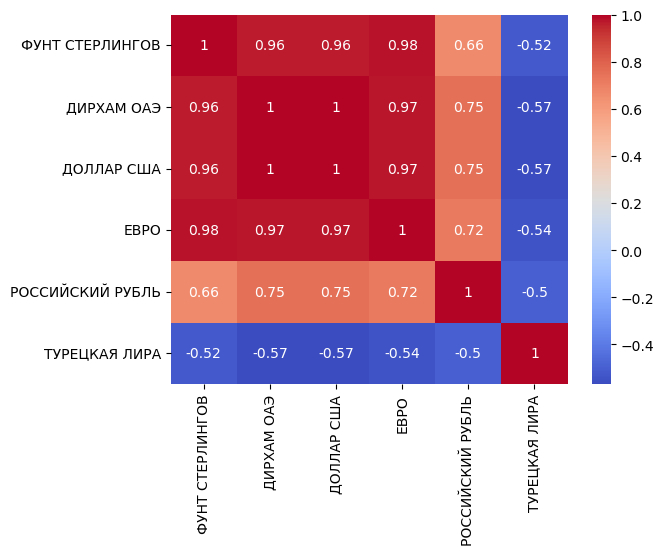

In [8]:
# проведем базовый EDA
print(kurs_nationalbank.info())
# построим матрицу корреляций
corr_matrix = kurs_nationalbank.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

На основе матрицы корреляций можно выяснить, какие из валют имеют сильную корреляцию друг с другом

На графике можно увидеть, что, например, Дирхам ОАЭ и Доллар США имеют величину коэффициента корреляции равна 1, следовательно полностью взаимосвязаны. Это связано с тем, курс дирхама с 1980 года привязан к доллару США в соотношении 1 доллар = 3,6725 дирхама. Убедимся в этом на графике зависимости:

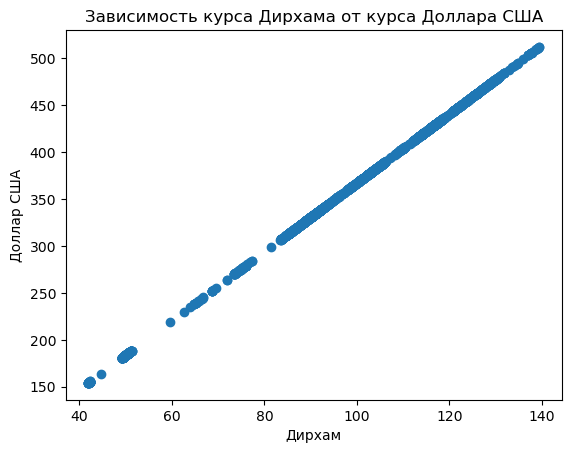

In [9]:
# построение scatter plot для курса евро и доллара США
plt.scatter(kurs_nationalbank['ДИРХАМ ОАЭ'], kurs_nationalbank['ДОЛЛАР США'])
plt.title('Зависимость курса Дирхама от курса Доллара США')
plt.xlabel('Дирхам')
plt.ylabel('Доллар США')
plt.show()

Далее можно построить графики, которые покажут, как изменился курс каждой из валют во времени:

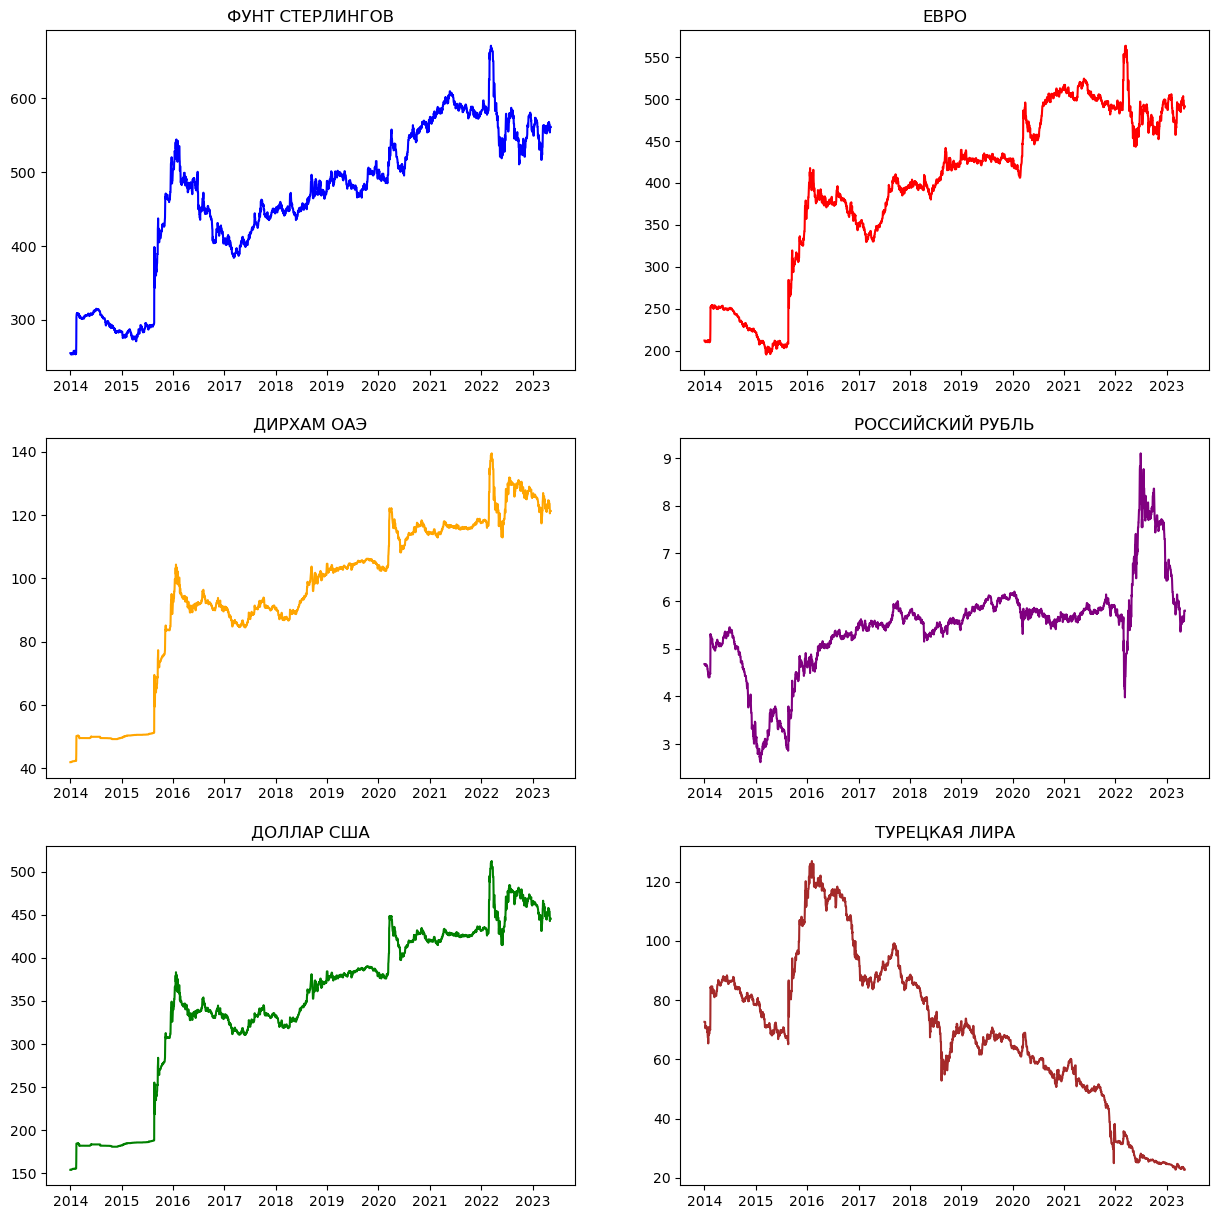

In [10]:
# построим графики изменения стоимости каждой валюты во времени
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs[0, 0].plot(kurs_nationalbank['Дата'], kurs_nationalbank['ФУНТ СТЕРЛИНГОВ'], color='blue')
axs[0, 0].set_title('ФУНТ СТЕРЛИНГОВ')
axs[1, 0].plot(kurs_nationalbank['Дата'], kurs_nationalbank['ДИРХАМ ОАЭ'], color='orange')
axs[1, 0].set_title('ДИРХАМ ОАЭ')
axs[2, 0].plot(kurs_nationalbank['Дата'], kurs_nationalbank['ДОЛЛАР США'], color='green')
axs[2, 0].set_title('ДОЛЛАР США')
axs[0, 1].plot(kurs_nationalbank['Дата'], kurs_nationalbank['ЕВРО'], color='red')
axs[0, 1].set_title('ЕВРО')
axs[1, 1].plot(kurs_nationalbank['Дата'], kurs_nationalbank['РОССИЙСКИЙ РУБЛЬ'], color='purple')
axs[1, 1].set_title('РОССИЙСКИЙ РУБЛЬ')
axs[2, 1].plot(kurs_nationalbank['Дата'], kurs_nationalbank['ТУРЕЦКАЯ ЛИРА'], color='brown')
axs[2, 1].set_title('ТУРЕЦКАЯ ЛИРА')
plt.show()    

Также можно построить гистограммы и boxplot'ы для каждой из валют, чтобы посмотреть на их распределение:

In [11]:
# удаляем warnings
warnings.filterwarnings('ignore')

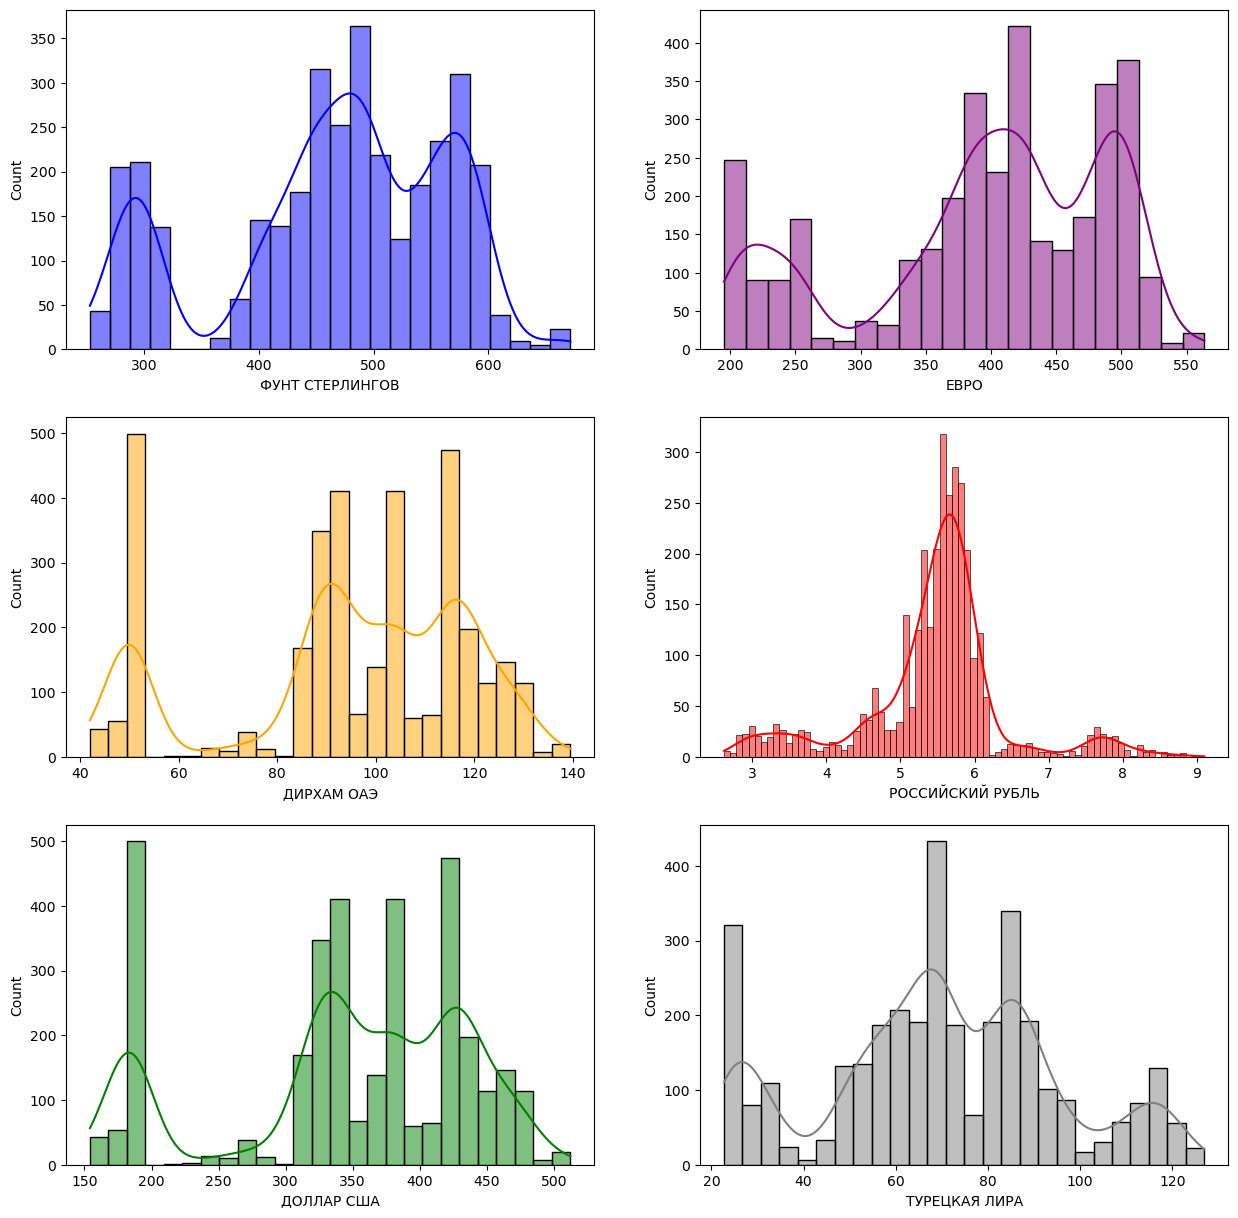

In [12]:
# построим гистограммы для каждой валюты
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(kurs_nationalbank['ФУНТ СТЕРЛИНГОВ'], kde=True, color='blue', ax=axs[0, 0])
sns.histplot(kurs_nationalbank['ДИРХАМ ОАЭ'], kde=True, color='orange', ax=axs[1, 0])
sns.histplot(kurs_nationalbank['ДОЛЛАР США'], kde=True, color='green', ax=axs[2, 0])
sns.histplot(kurs_nationalbank['ЕВРО'], kde=True, color='purple', ax=axs[0, 1])
sns.histplot(kurs_nationalbank['РОССИЙСКИЙ РУБЛЬ'], kde=True, color='red', ax=axs[1, 1])
sns.histplot(kurs_nationalbank['ТУРЕЦКАЯ ЛИРА'], kde=True, color='grey', ax=axs[2, 1])
plt.show()

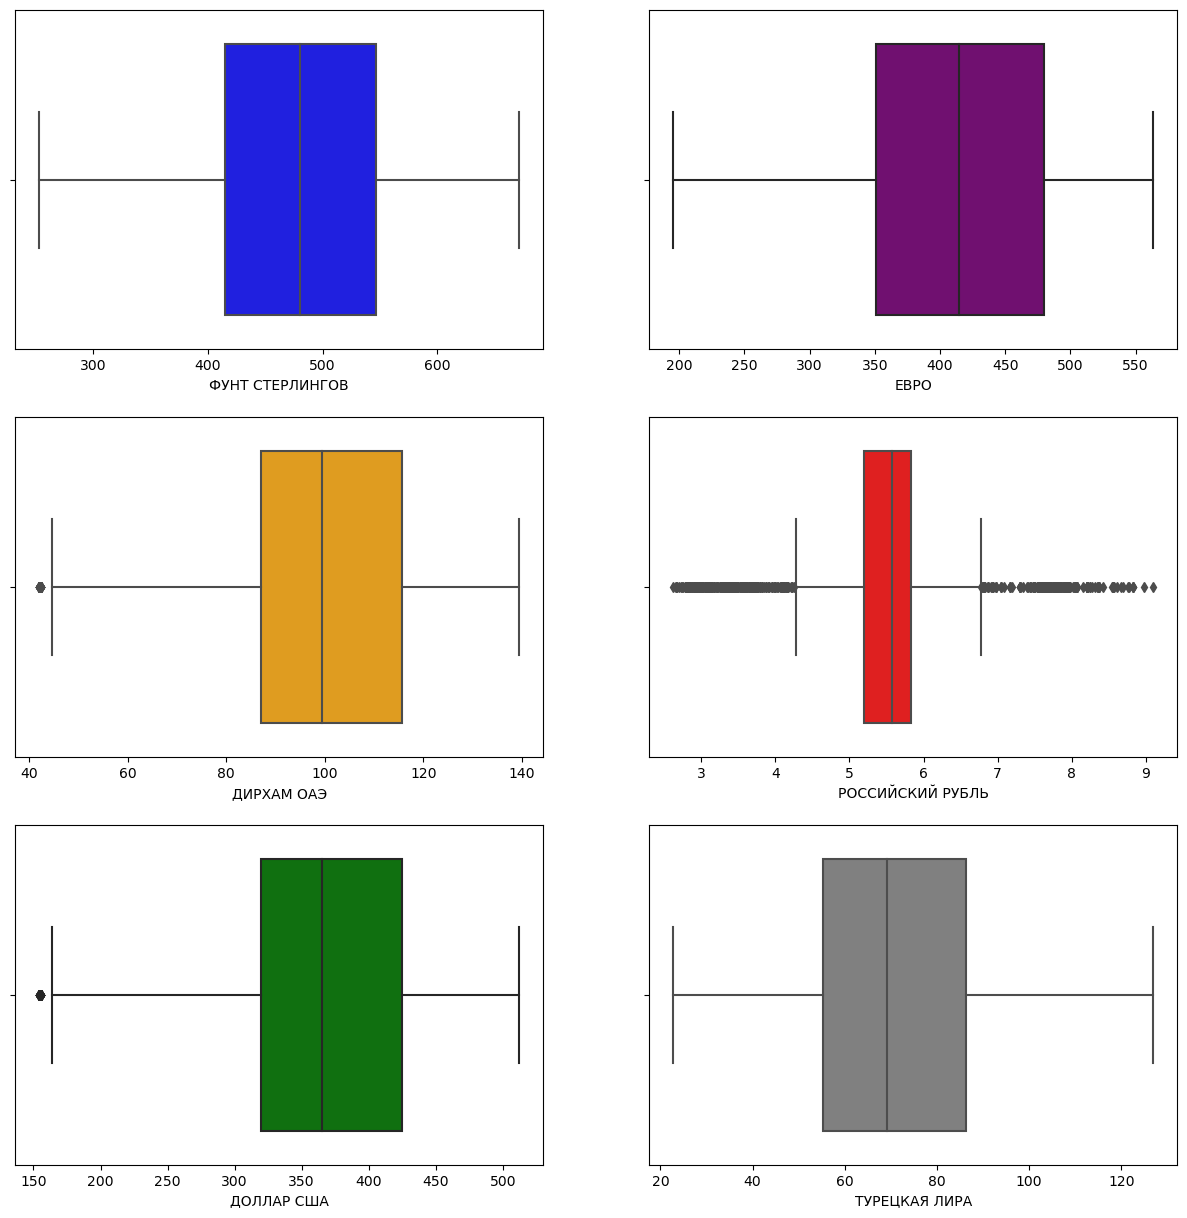

In [13]:
# построим boxplot'ы для каждой валюты
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
sns.boxplot(kurs_nationalbank['ФУНТ СТЕРЛИНГОВ'], color='blue', ax=axs[0, 0])
sns.boxplot(kurs_nationalbank['ДИРХАМ ОАЭ'], color='orange', ax=axs[1, 0])
sns.boxplot(kurs_nationalbank['ДОЛЛАР США'], color='green', ax=axs[2, 0])
sns.boxplot(kurs_nationalbank['ЕВРО'], color='purple', ax=axs[0, 1])
sns.boxplot(kurs_nationalbank['РОССИЙСКИЙ РУБЛЬ'], color='red', ax=axs[1, 1])
sns.boxplot(kurs_nationalbank['ТУРЕЦКАЯ ЛИРА'], color='grey', ax=axs[2, 1])
plt.show()

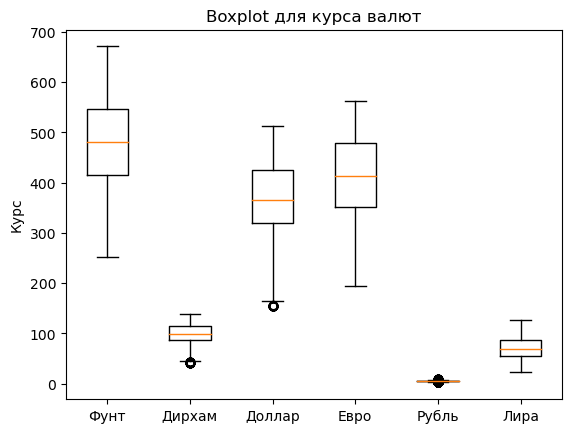

In [14]:
# построим boxplot для всех валют
plt.boxplot([kurs_nationalbank['ФУНТ СТЕРЛИНГОВ'], kurs_nationalbank['ДИРХАМ ОАЭ'], kurs_nationalbank['ДОЛЛАР США'], kurs_nationalbank['ЕВРО'], kurs_nationalbank['РОССИЙСКИЙ РУБЛЬ'], kurs_nationalbank['ТУРЕЦКАЯ ЛИРА']])
plt.xticks([1, 2, 3, 4, 5, 6], ['Фунт', 'Дирхам', 'Доллар', 'Евро', 'Рубль', 'Лира'])
plt.title('Boxplot для курса валют')
plt.ylabel('Курс')
plt.show()

Гистограмма и boxplot курса Рубля показывают, что распределение курса близко к нормальному.

Построим на одном графике курсы валют:

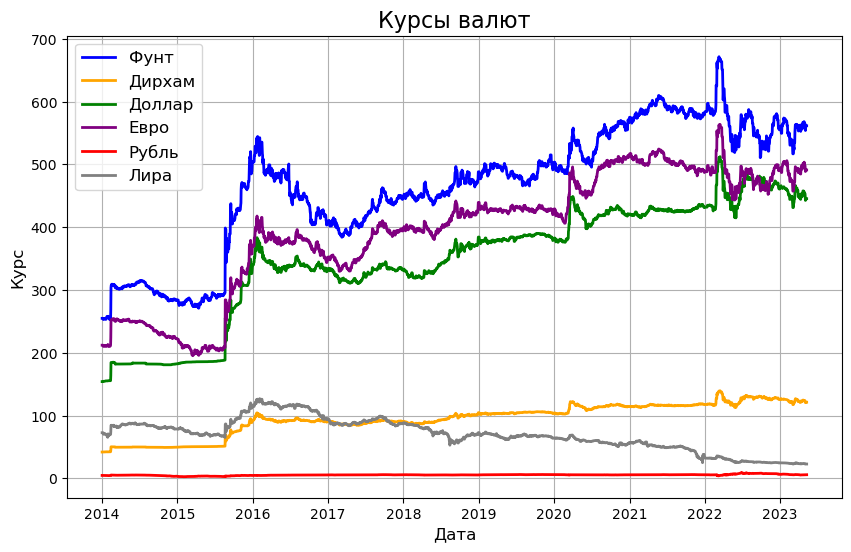

In [15]:
# устанавливаем индекс по дате
kurs_nationalbank = kurs_nationalbank.set_index('Дата')

fig, ax = plt.subplots(figsize=(10, 6))
# строим график курсов валют
ax.plot(kurs_nationalbank.index, kurs_nationalbank['ФУНТ СТЕРЛИНГОВ'], color='blue', linewidth=2, label='Фунт')
ax.plot(kurs_nationalbank.index, kurs_nationalbank['ДИРХАМ ОАЭ'], color='orange', linewidth=2, label='Дирхам')
ax.plot(kurs_nationalbank.index, kurs_nationalbank['ДОЛЛАР США'], color='green', linewidth=2, label='Доллар')
ax.plot(kurs_nationalbank.index, kurs_nationalbank['ЕВРО'], color='purple', linewidth=2, label='Евро')
ax.plot(kurs_nationalbank.index, kurs_nationalbank['РОССИЙСКИЙ РУБЛЬ'], color='red', linewidth=2, label='Рубль')
ax.plot(kurs_nationalbank.index, kurs_nationalbank['ТУРЕЦКАЯ ЛИРА'], color='grey', linewidth=2, label='Лира')
ax.grid(True)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Курс', fontsize=12)
# добавляем легенду
ax.legend(loc='upper left', fontsize=12)
# задаем заголовок графика
plt.title('Курсы валют', fontsize=16)
# выводим график
plt.show()

Посмортим детальнее на курс дирхама и лиры

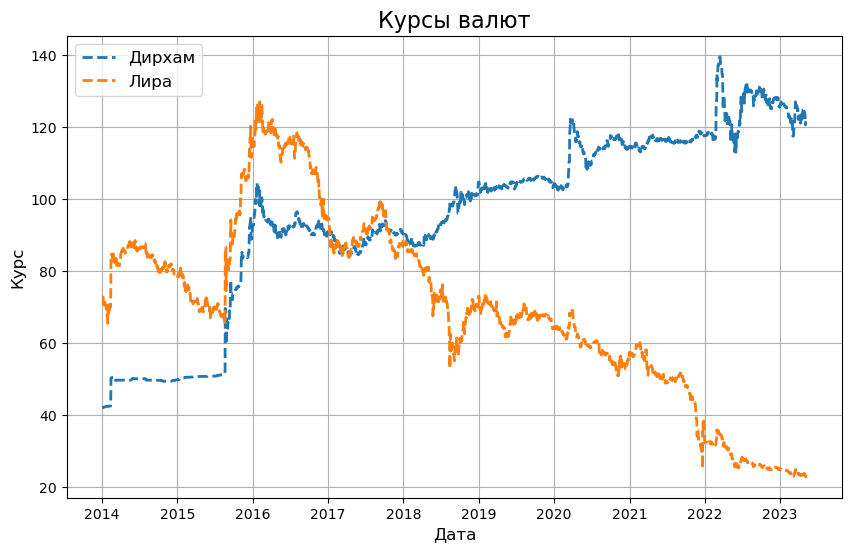

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
# строим график курса дирхама и лиры
ax.plot(kurs_nationalbank.index, kurs_nationalbank['ДИРХАМ ОАЭ'], linewidth=2, linestyle='--', label='Дирхам')
ax.plot(kurs_nationalbank.index, kurs_nationalbank['ТУРЕЦКАЯ ЛИРА'], linewidth=2, linestyle='--', label='Лира')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Курс', fontsize=12)
# добавляем легенду
ax.legend(loc='upper left', fontsize=12)
# задаем заголовок графика
plt.title('Курсы валют', fontsize=16)
# выводим график
plt.show()

На графике видно, что турецкая лира последовательно ослабевает с начала 2016 года. Этому способствовали периодические конфликты с западными партнерами, включая США, сокращение валютных резервов и рост долга, осложнившаяся обстановка в мире в связи с пандемией, а также иррациональный эксперимент Эрдогана.

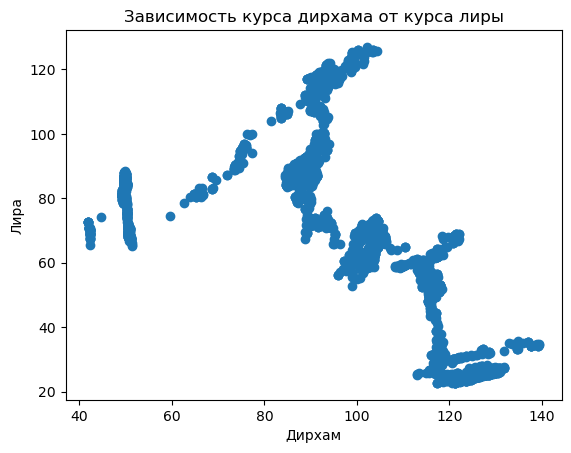

In [17]:
# построение scatter plot для курса евро и доллара США
plt.scatter(kurs_nationalbank['ДИРХАМ ОАЭ'], kurs_nationalbank['ТУРЕЦКАЯ ЛИРА'])
plt.title('Зависимость курса дирхама от курса лиры')
plt.xlabel('Дирхам')
plt.ylabel('Лира')
plt.show()

Посмортим детальнее на курс рубля

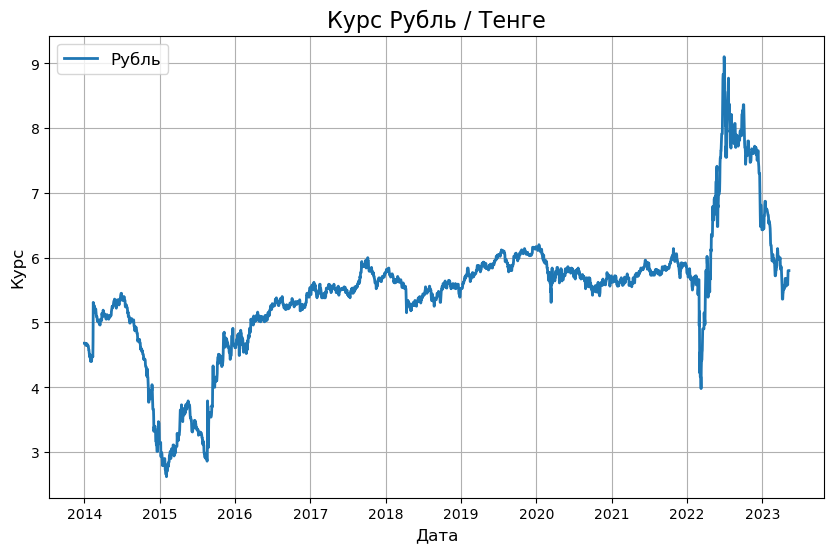

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
# строим график курса рубля
ax.plot(kurs_nationalbank.index, kurs_nationalbank['РОССИЙСКИЙ РУБЛЬ'], linewidth=2, label='Рубль')
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Курс', fontsize=12)
# добавляем легенду
ax.legend(loc='upper left', fontsize=12)
# задаем заголовок графика
plt.title('Курс Рубль / Тенге', fontsize=16)
# выводим график
plt.show()

На основе полученных визуализаций можно сделать выводы о взаимосвязи между курсами различных валют, а также выдвинуть гипотезы о том, какие факторы могут влиять на изменение курсов валют. Для создания новых переменных можно использовать данные о рыночной конъюнктуре, политической ситуации в различных странах, экономических показателях и т.д.

## Парсинг данных по ключевой ставке Национального Банка Казахстана

In [108]:
# cоздаем URL object
url_stavka = 'https://online.zakon.kz/Document/?doc_id=36378707&pos=4;-71#pos=4;-71'
# jтправляем запрос
page_stavka = requests.get(url)
print(page_stavka)

<Response [200]>


In [109]:
# читаем HTML-таблицы с сайта
df_stavka = pd.read_html('https://online.zakon.kz/Document/?doc_id=36378707&pos=4;-71#pos=4;-71')
# находим сколько всего таблиц на стр
print(len(df))

1


In [110]:
# называем нужную таблицу
stavki_nationalbank = df_stavka[-1]
# сохраняем DataFrame в csv
stavki_nationalbank.to_csv('stavki_nationalbank.csv', index=True)
# вывод
stavki_nationalbank

,0,1,2,3
0,Дата установления ставки (с),"Размер ставки, %","Коридор базовой ставки, %",Примечание
1,02.09.2015,120,"7,0 - 17,0",Пресс-релиз НБ РК от 2 сентября 2015 года № 43...
2,02.10.2015,160,"15,0 - 17,0",Пресс-релиз НБ РК от 2 октября 2015 года № 49 ...
3,02.02.2016,170,"15,0 - 19,0",Пресс-релиз НБ РК от 1 февраля 2016 года № 2 «...
4,14.03.2016,170,"15,0 - 19,0",Пресс-релиз НБ РК от 14 марта 2016 года № 6 «Н...
...,...,...,...,...
60,27.10.2022,160,"15,0-17,0",Пресс-релиз НБ РК от 26 октября 2022 года «О п...
61,06.12.2022,1675,"15,75-17,75",Пресс-релиз НБ РК от 5 декабря 2022 года «О по...
62,16.01.2023,1675,"15,75-17,75",Пресс-релиз НБ РК от 13 января 2023 года «О со...
63,27.02.2023,1675,"15,75-17,75",Пресс-релиз НБ РК от 24 февраля 2023 года «О с...


In [111]:
# смотрим на типы данных
stavki_nationalbank.dtypes

0    object
1    object
2    object
3    object
dtype: object

In [112]:
# устанавливаем названия колонок
stavki_nationalbank.columns = ["Дата", "Размер ставки, %", "Коридор базовой ставки, %", "Примечание"]
# удаляем ненужную строку
stavki_nationalbank = stavki_nationalbank.drop(0, axis=0)
# вывод
stavki_nationalbank

,Дата,"Размер ставки, %","Коридор базовой ставки, %",Примечание
1,02.09.2015,120,"7,0 - 17,0",Пресс-релиз НБ РК от 2 сентября 2015 года № 43...
2,02.10.2015,160,"15,0 - 17,0",Пресс-релиз НБ РК от 2 октября 2015 года № 49 ...
3,02.02.2016,170,"15,0 - 19,0",Пресс-релиз НБ РК от 1 февраля 2016 года № 2 «...
4,14.03.2016,170,"15,0 - 19,0",Пресс-релиз НБ РК от 14 марта 2016 года № 6 «Н...
5,05.05.2016,150,"14,0 - 16,0",Пресс-релиз НБ РК от 5 мая 2016 года № 9 «О ба...
...,...,...,...,...
60,27.10.2022,160,"15,0-17,0",Пресс-релиз НБ РК от 26 октября 2022 года «О п...
61,06.12.2022,1675,"15,75-17,75",Пресс-релиз НБ РК от 5 декабря 2022 года «О по...
62,16.01.2023,1675,"15,75-17,75",Пресс-релиз НБ РК от 13 января 2023 года «О со...
63,27.02.2023,1675,"15,75-17,75",Пресс-релиз НБ РК от 24 февраля 2023 года «О с...


In [113]:
# меняем 10.04.2023* на норм значение
stavki_nationalbank.iloc[len(stavki_nationalbank)-1, 0] = "10.04.2023"
# меняем тип данных на datetime
stavki_nationalbank['Дата'] = pd.to_datetime(stavki_nationalbank['Дата'], format="%d.%m.%Y")
# меняем тип данных на float64
stavki_nationalbank['Размер ставки, %'] = pd.to_numeric(stavki_nationalbank['Размер ставки, %']) 

stavki_nationalbank

,Дата,"Размер ставки, %","Коридор базовой ставки, %",Примечание
1,2015-09-02,120,"7,0 - 17,0",Пресс-релиз НБ РК от 2 сентября 2015 года № 43...
2,2015-10-02,160,"15,0 - 17,0",Пресс-релиз НБ РК от 2 октября 2015 года № 49 ...
3,2016-02-02,170,"15,0 - 19,0",Пресс-релиз НБ РК от 1 февраля 2016 года № 2 «...
4,2016-03-14,170,"15,0 - 19,0",Пресс-релиз НБ РК от 14 марта 2016 года № 6 «Н...
5,2016-05-05,150,"14,0 - 16,0",Пресс-релиз НБ РК от 5 мая 2016 года № 9 «О ба...
...,...,...,...,...
60,2022-10-27,160,"15,0-17,0",Пресс-релиз НБ РК от 26 октября 2022 года «О п...
61,2022-12-06,1675,"15,75-17,75",Пресс-релиз НБ РК от 5 декабря 2022 года «О по...
62,2023-01-16,1675,"15,75-17,75",Пресс-релиз НБ РК от 13 января 2023 года «О со...
63,2023-02-27,1675,"15,75-17,75",Пресс-релиз НБ РК от 24 февраля 2023 года «О с...


In [114]:
# вытаскиваем значения первой колонки
col1_list = stavki_nationalbank['Размер ставки, %'].tolist()
print(col1_list)

[120, 160, 170, 170, 150, 150, 130, 130, 125, 120, 120, 110, 110, 105, 105, 1025, 1025, 1025, 975, 95, 925, 90, 90, 90, 925, 925, 925, 925, 900, 900, 900, 925, 925, 925, 925, 1200, 1200, 95, 95, 95, 90, 90, 90, 90, 90, 90, 90, 90, 925, 950, 975, 975, 1025, 135, 135, 140, 140, 145, 145, 160, 1675, 1675, 1675, 1675]


In [115]:
# функция для изменения значений
def change_value(x):
    if x < 180:
        return x / 10
    elif x > 200:
        return x / 100
    else:
        return x
# применяем функцию к столбцу 'col1'
stavki_nationalbank['Размер ставки, %'] = stavki_nationalbank['Размер ставки, %'].apply(change_value)
# вытаскиваем значения первой колонки
col1_list = stavki_nationalbank['Размер ставки, %'].tolist()
print(col1_list)

[12.0, 16.0, 17.0, 17.0, 15.0, 15.0, 13.0, 13.0, 12.5, 12.0, 12.0, 11.0, 11.0, 10.5, 10.5, 10.25, 10.25, 10.25, 9.75, 9.5, 9.25, 9.0, 9.0, 9.0, 9.25, 9.25, 9.25, 9.25, 9.0, 9.0, 9.0, 9.25, 9.25, 9.25, 9.25, 12.0, 12.0, 9.5, 9.5, 9.5, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.25, 9.5, 9.75, 9.75, 10.25, 13.5, 13.5, 14.0, 14.0, 14.5, 14.5, 16.0, 16.75, 16.75, 16.75, 16.75]


Построим график изменения ставки 

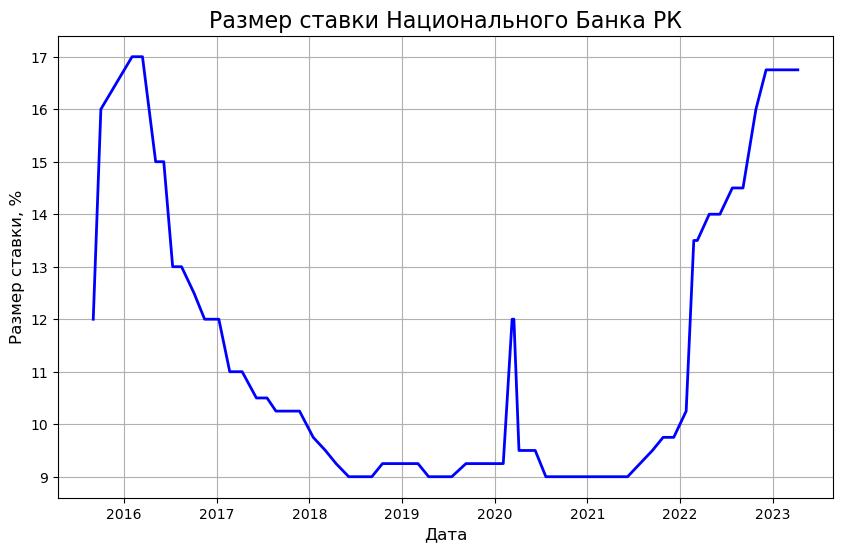

In [116]:
# устанавливаем дату как индекс
stavki_nationalbank = stavki_nationalbank.set_index('Дата')

fig, ax = plt.subplots(figsize=(10, 6))
# строим график
ax.plot(stavki_nationalbank.index, stavki_nationalbank['Размер ставки, %'], color='blue', linewidth=2)
# добавляем сетку и подписи осей
ax.grid(True)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Размер ставки, %', fontsize=12)
# задаем заголовок графика
plt.title('Размер ставки Национального Банка РК', fontsize=16)
# вывод
plt.show()

Построим гистограмму распределения размера ставки

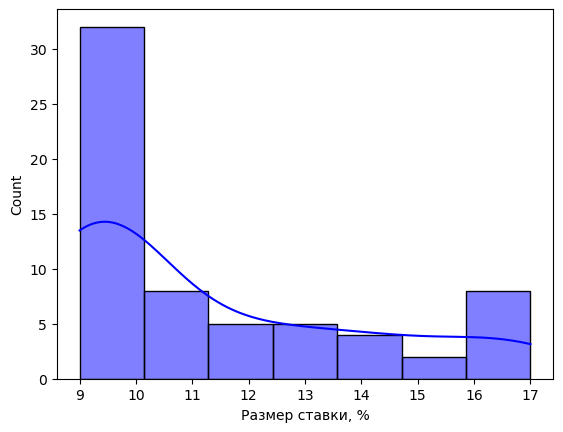

In [117]:
sns.histplot(stavki_nationalbank['Размер ставки, %'], kde=True, color='blue')
plt.show()

Построим boxplot размера ставки

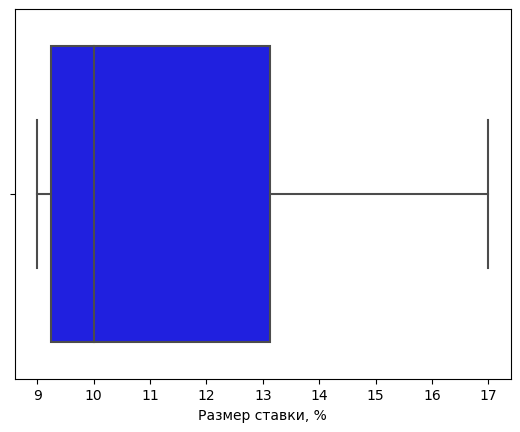

In [118]:
sns.boxplot(stavki_nationalbank['Размер ставки, %'], color='blue')
plt.show()

Объединим данные

In [119]:
merged_df = pd.merge(kurs_nationalbank, stavki_nationalbank, left_on='Дата', right_on='Дата', how='outer')
table_merged = merged_df
table_merged.head()

,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",Примечание
Дата,,,,,,,,,
2014-01-01,254.8,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
2014-01-02,254.8,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
2014-01-03,254.8,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
2014-01-04,254.8,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
2014-01-05,254.8,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN


In [120]:
# сохраняем DataFrame в csv
table_merged.to_csv('table_merged.csv', index=True)

In [121]:
# меняем индексы
table_merged = table_merged.reset_index(drop=False)
# вывод
table_merged

,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",Примечание
0,2014-01-01,254.80,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
1,2014-01-02,254.80,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
2,2014-01-03,254.80,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
3,2014-01-04,254.80,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
4,2014-01-05,254.80,41.95,154.06,212.02,4.68,72.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3412,2023-05-06,561.32,121.27,445.28,490.97,5.80,22.84,NaN,NaN,NaN
3413,2023-05-07,561.32,121.27,445.28,490.97,5.80,22.84,NaN,NaN,NaN
3414,2023-05-08,561.32,121.27,445.28,490.97,5.80,22.84,NaN,NaN,NaN
3415,2023-05-09,561.32,121.27,445.28,490.97,5.80,22.84,NaN,NaN,NaN


In [122]:
# посмотрим на типы данных
table_merged.dtypes

Дата                         datetime64[ns]
ФУНТ СТЕРЛИНГОВ                     float64
ДИРХАМ ОАЭ                          float64
ДОЛЛАР США                          float64
ЕВРО                                float64
РОССИЙСКИЙ РУБЛЬ                    float64
ТУРЕЦКАЯ ЛИРА                       float64
Размер ставки, %                    float64
Коридор базовой ставки, %            object
Примечание                           object
dtype: object

In [123]:
# проверяем есть ли значения размера ставки в даты изменения
table_merged.loc[table_merged['Дата'] == '2015-10-02']

,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",Примечание
639,2015-10-02,410.52,73.75,270.9,302.32,4.16,89.69,16.0,"15,0 - 17,0",Пресс-релиз НБ РК от 2 октября 2015 года № 49 ...


In [124]:
# замена пропущенных значений на значения из следующих ячеек
table_merged['Размер ставки, %'] = table_merged['Размер ставки, %'].fillna(method='ffill')
table_merged['Коридор базовой ставки, %'] = table_merged['Коридор базовой ставки, %'].fillna(method='ffill')

In [125]:
# выводим значения когда вспервые есть значение размера ставки
table_merged.loc[table_merged['Дата'] == '2015-09-02']

,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",Примечание
609,2015-09-02,359.98,63.97,234.94,264.85,3.6,80.4,12.0,"7,0 - 17,0",Пресс-релиз НБ РК от 2 сентября 2015 года № 43...


In [126]:
# проверяем следующий день
table_merged.loc[table_merged['Дата'] == '2015-09-03']

,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %",Примечание
610,2015-09-03,368.86,65.66,241.15,272.07,3.61,81.85,12.0,"7,0 - 17,0",NaN


In [127]:
# удаляем первые 609 строк так как там нет данных по ставке 
table_merged = table_merged.drop(index=range(609))
# удалим колонку Примечание
table_merged = table_merged.drop(columns=['Примечание'])
# вывод
table_merged

,Дата,ФУНТ СТЕРЛИНГОВ,ДИРХАМ ОАЭ,ДОЛЛАР США,ЕВРО,РОССИЙСКИЙ РУБЛЬ,ТУРЕЦКАЯ ЛИРА,"Размер ставки, %","Коридор базовой ставки, %"
609,2015-09-02,359.98,63.97,234.94,264.85,3.60,80.40,12.00,"7,0 - 17,0"
610,2015-09-03,368.86,65.66,241.15,272.07,3.61,81.85,12.00,"7,0 - 17,0"
611,2015-09-04,365.68,65.28,239.76,269.37,3.58,81.07,12.00,"7,0 - 17,0"
612,2015-09-05,365.08,65.24,239.60,266.91,3.54,80.44,12.00,"7,0 - 17,0"
613,2015-09-06,365.08,65.24,239.60,266.91,3.54,80.44,12.00,"7,0 - 17,0"
...,...,...,...,...,...,...,...,...,...
3412,2023-05-06,561.32,121.27,445.28,490.97,5.80,22.84,16.75,"15,75-17,75"
3413,2023-05-07,561.32,121.27,445.28,490.97,5.80,22.84,16.75,"15,75-17,75"
3414,2023-05-08,561.32,121.27,445.28,490.97,5.80,22.84,16.75,"15,75-17,75"
3415,2023-05-09,561.32,121.27,445.28,490.97,5.80,22.84,16.75,"15,75-17,75"


In [128]:
# сброс индексов
table_merged = table_merged.reset_index(drop=True)

In [129]:
# сохраняем DataFrame в csv
table_merged.to_csv('table_res.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Дата                       2808 non-null   datetime64[ns]
 1   ФУНТ СТЕРЛИНГОВ            2808 non-null   float64       
 2   ДИРХАМ ОАЭ                 2808 non-null   float64       
 3   ДОЛЛАР США                 2808 non-null   float64       
 4   ЕВРО                       2808 non-null   float64       
 5   РОССИЙСКИЙ РУБЛЬ           2808 non-null   float64       
 6   ТУРЕЦКАЯ ЛИРА              2808 non-null   float64       
 7   Размер ставки, %           2808 non-null   float64       
 8   Коридор базовой ставки, %  2808 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 197.6+ KB
None


<AxesSubplot:>

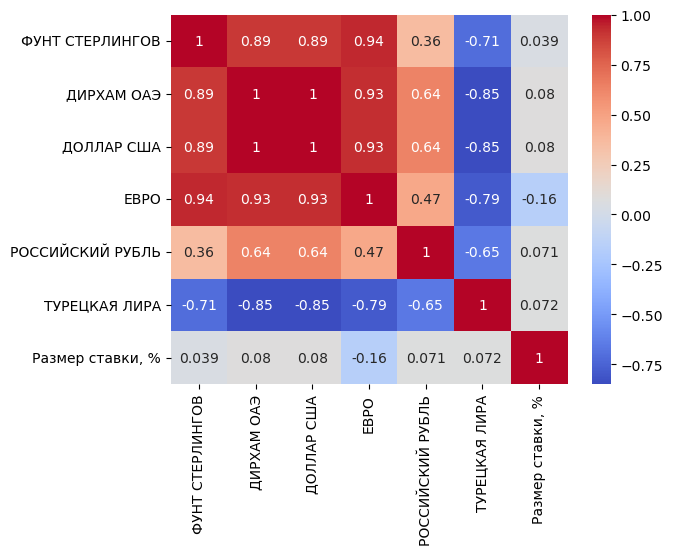

In [135]:
# проведем базовый EDA
print(table_merged.info())
# построим матрицу корреляций
corr_matrix2 = table_merged.corr()
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')

## Cоздание признаков, какие примерно гипотезы будем дальше проверять:

1. Считается, что важную роль в курсах валют играет налоговая неделя, в течение которой крупнейшие компании выходят на рынки и закупаются национальной валютой для выплат в пользу бюджета. Время действия налоговой недели (подготовительный период – 15-19 числа, период платежей – 20-25 числа). Насколько сильно она влияет на процесс курсообразования тенге?

На основании имеющихся признаков создадим новые. Из столбца с датой достанем является ли этот день днём налоговой недели и посмотрим на динамику курса в такие дни.

2. В какие дни выгоднее всего покупать или сдавать валюту? В интернете есть исследования, в которых говорится, что наиболее активными днями на валютном рынке РБ являются понедельник и вторник. Именно в начале недели чаще всего бывает максимальный курс, по которому выгоднее продавать валюту. Ближе к концу недели курс, чаще всего, снижается. Будет ли это работать в нашем случае?

Для начала все дни сгруппируем по неделям. Для каждой недели надо найти наименьшее и наибольшее значение курса. Затем необходимо пределить в какой день недели было наименьшее значение курса, а в какой – наибольшее. Также можно создать несколько интересных показателей, например, разница между минимальным курсом за неделю и максимальным. А также самую большую разницу между минимумом и максимумом недели.

Проверим эти гипотезы с помощью математической статистики.

## Машинное обучение

Планируем предсказывать значения курса рубль / тенге, так как финансовое положение одного участника команды напрямую зависит от этого. 
Зачем это нужно? Знание будущего курса валют может помочь принимать решения по обмену валюты. 
Предсказании будущего значения курса валюты - это задача регрессии.
В случае задачи регрессии можно использовать метрики, такие как MAE, MSE, R-квадрат. 
Для этого разобъем выборку на обучающую и тестовую, сделаем необходимую предобработку данных и обучим несколько моделей, подбирая гиперпараметры.